In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading data


In [3]:
df = pd.read_csv('C:/Users/HP/OneDrive - National Economics University/Data Prep/Class code/review_stats_data.csv')
df

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity
0,Boeing 777,Couple Leisure,Premium Economy,Chennai to London,Jul-23,3.0,2.0,1,1,4.0,1,no,NaN
1,A321neo,Couple Leisure,Economy Class,Istanbul to London,Jul-23,2.0,2.0,NaN,NaN,1.0,1,no,NaN
2,NaN,Solo Leisure,Economy Class,London to Edinburgh,Nov-22,2.0,5.0,3,3,1.0,2,no,NaN
3,Boeing 777 -200,Family Leisure,Premium Economy,Kingston to London,Jun-23,5.0,4.0,4,3,3.0,3,no,NaN
4,Boeing 777-200,Couple Leisure,Economy Class,London Heathrow to Cape Town,Jun-23,1.0,3.0,1,3,3.0,2,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3593,NaN,NaN,Economy Class,NaN,NaN,2.0,3.0,2,3,NaN,3,no,NaN
3594,NaN,NaN,Business Class,NaN,NaN,4.0,5.0,4,Inflight Entertainment,NaN,3,yes,NaN
3595,NaN,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,yes,NaN
3596,NaN,NaN,Premium Economy,NaN,NaN,1.0,3.0,5,Inflight Entertainment,NaN,1,no,NaN


#### Data cleaning and preparation

- Replace error values by NaN
- Drop unneccessary column
- Convert data type of columns that contain number to numeric
- Replace the missing values by median value of that column
- Encode "Type of Traveller", "Seat Type" and "Recommended" into number

In [4]:
for x in df.index:
    if df.loc[x, "Food & Beverages"] == "Food & Beverages":
        df.loc[x, "Food & Beverages"] = np.nan

for x in df.index:
    if df.loc[x, "Inflight Entertainment"] == "Inflight Entertainment":
        df.loc[x, "Inflight Entertainment"] = np.nan


In [5]:
# Delete column Wifi & Connectivity
df.drop('Wifi & Connectivity', axis=1, inplace=True)

In [6]:
# Convert column with numbers to numeric
convert_list = ["Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Inflight Entertainment", "Ground Service", "Value For Money"]
for i in range(len(convert_list)):
    df[convert_list[i]] = pd.to_numeric(df[convert_list[i]])



In [7]:
# Filling missing data of "Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Inflight Entertainment", "Ground Service", "Value For Money" with median value
for i in range(len(convert_list)):
    df[convert_list[i]].fillna(df[convert_list[i]].median(), inplace=True)

In [8]:
# Delete all observations that contain missing value
df.dropna(axis=0, how='any', inplace=True)

In [9]:
#Convert Type of Traveler to notation
print(df["Type Of Traveller"].unique())
traveller_type = {'Solo Leisure': 1, 'Couple Leisure': 2, 'Family Leisure': 3, 'Business':4}
df["Type Of Traveller"] = df["Type Of Traveller"].map(traveller_type)

            

['Couple Leisure' 'Family Leisure' 'Business' 'Solo Leisure']


In [10]:
# Convert Seat Type to notation
print(df["Seat Type"].unique())
seat_type = {'Economy Class': 1, 'Premium Economy': 2, 'Business Class': 3, 'First Class':4}
df["Seat Type"] = df["Seat Type"].map(seat_type)


['Premium Economy' 'Economy Class' 'Business Class' 'First Class']


In [11]:
# Convert Recommended to notation
print(df["Recommended"].unique())
recommended = {'yes': 1, 'no': 0}
df["Recommended"] = df["Recommended"].map(recommended)


['no' 'yes']


In [12]:
# Convert format of Date Flown
month_mask = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr':4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
year = []
month = []
for x in df.index:
    year.append(2000 + int(df.loc[x, "Date Flown"].split('-')[1]))
    m = df.loc[x, "Date Flown"].split('-')[0]
    for key, value in month_mask.items():
        if m == key:
            m = value
            break
    month.append(m)
    

In [13]:
# Create column for year and month
df['Month Flown'] = month
df['Year Flown'] = year

In [14]:
df = df.sort_values(by=['Year Flown', 'Month Flown'], ascending= [False, False])

In [15]:
df

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Month Flown,Year Flown
0,Boeing 777,2,2,Chennai to London,Jul-23,3.0,2.0,1.0,1.0,4.0,1,0,7,2023
1,A321neo,2,1,Istanbul to London,Jul-23,2.0,2.0,3.0,3.0,1.0,1,0,7,2023
8,A320,1,1,Berlin to London,Jul-23,5.0,5.0,3.0,3.0,4.0,5,1,7,2023
3,Boeing 777 -200,3,2,Kingston to London,Jun-23,5.0,4.0,4.0,3.0,3.0,3,0,6,2023
4,Boeing 777-200,2,1,London Heathrow to Cape Town,Jun-23,1.0,3.0,1.0,3.0,3.0,2,0,6,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762,A320,1,3,Tel Aviv to London LHR,Dec-14,5.0,5.0,5.0,4.0,5.0,4,1,12,2014
2789,Boeing 777-200,3,1,YUL to FCO via LHR,Oct-14,4.0,4.0,3.0,3.0,4.0,5,1,10,2014
2759,A321 / Boeing 747-400,1,1,CAI to JFK via LHR,Sep-14,1.0,5.0,3.0,4.0,5.0,2,0,9,2014
2778,A318,1,3,LCY to JFK via Shannon,Aug-14,5.0,5.0,5.0,5.0,5.0,3,1,8,2014


#### Descriptive Statistic and Visualization


In [16]:
df["Year Flown"].value_counts()

2016    415
2017    385
2015    357
2018    228
2019    203
2022    109
2023     61
2020     49
2021     47
2014      5
Name: Year Flown, dtype: int64

In [17]:
df["Recommended"].value_counts()

0    991
1    868
Name: Recommended, dtype: int64

In [18]:
df["Type Of Traveller"].value_counts()

2    645
1    554
4    426
3    234
Name: Type Of Traveller, dtype: int64

In [24]:
df["Seat Type"].value_counts()

1    850
3    678
2    188
4    143
Name: Seat Type, dtype: int64

In [19]:
df.describe()

,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Month Flown,Year Flown
count,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000
mean,2.286175,2.061323,2.961269,3.405594,2.794513,2.837009,3.124260,2.877891,0.466918,6.740721,2017.395912
std,1.122179,1.061360,1.348605,1.434651,1.393415,1.128840,1.367447,1.413315,0.499039,3.443768,2.170183
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2014.000000
25%,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.000000,4.000000,2016.000000
50%,2.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,0.000000,7.000000,2017.000000
75%,3.000000,3.000000,4.000000,5.000000,4.000000,3.000000,4.000000,4.000000,1.000000,10.000000,2019.000000
max,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,12.000000,2023.000000


In [20]:
df.corr(method='pearson')

C:\Users\HP\AppData\Local\Temp\ipykernel_10888\1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Month Flown,Year Flown
Type Of Traveller,1.000000,0.105911,-0.195030,-0.156047,-0.179563,-0.139906,-0.171197,-0.234167,-0.218549,-0.025495,-0.005442
Seat Type,0.105911,1.000000,0.099424,0.117266,0.139538,0.058660,0.015884,-0.019404,-0.008362,-0.001390,0.005810
Seat Comfort,-0.195030,0.099424,1.000000,0.570600,0.587200,0.503179,0.511597,0.683413,0.645864,0.011395,-0.014619
Cabin Staff Service,-0.156047,0.117266,0.570600,1.000000,0.676295,0.419039,0.486498,0.644776,0.632932,-0.021733,-0.012709
Food & Beverages,-0.179563,0.139538,0.587200,0.676295,1.000000,0.503584,0.465633,0.682519,0.662049,0.012333,-0.005475
Inflight Entertainment,-0.139906,0.058660,0.503179,0.419039,0.503584,1.000000,0.365979,0.476678,0.468603,-0.019461,0.018007
Ground Service,-0.171197,0.015884,0.511597,0.486498,0.465633,0.365979,1.000000,0.614957,0.576649,-0.022870,-0.039438
Value For Money,-0.234167,-0.019404,0.683413,0.644776,0.682519,0.476678,0.614957,1.000000,0.785222,0.007646,-0.017395
Recommended,-0.218549,-0.008362,0.645864,0.632932,0.662049,0.468603,0.576649,0.785222,1.000000,0.012857,-0.017717
Month Flown,-0.025495,-0.001390,0.011395,-0.021733,0.012333,-0.019461,-0.022870,0.007646,0.012857,1.000000,-0.202879


Number of flights reviewed for each year from 2014 - 2023

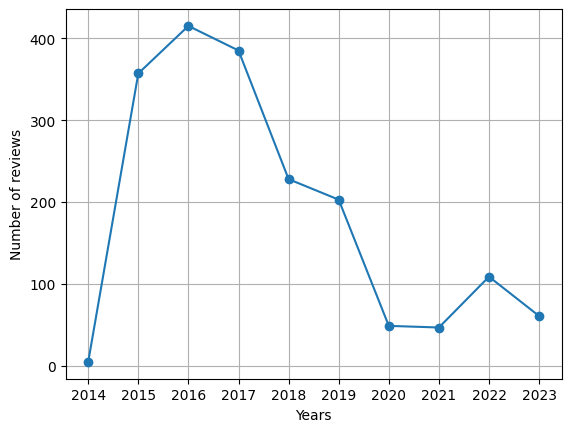

In [21]:
plt.plot(df["Year Flown"].unique(), df["Year Flown"].value_counts()[df["Year Flown"].unique()], marker='o')
plt.xlabel("Years")
plt.ylabel("Number of reviews")
plt.xticks(df["Year Flown"].unique())
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Inflight Entertainment')

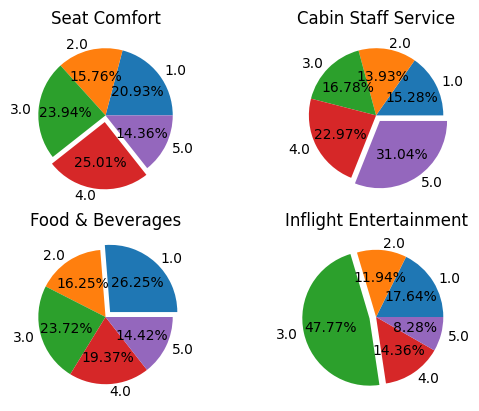

In [22]:
figure, axis = plt.subplots(2,2)

# Seat comfort
stars = np.sort(df["Seat Comfort"].unique())
number = df["Seat Comfort"].value_counts()[stars]
axis[0,0].pie(number, labels=stars, autopct='%.2f%%', explode=[0 , 0, 0, 0.1, 0])
axis[0,0].set_title("Seat Comfort")

# Cabin Staff Service
stars = np.sort(df["Cabin Staff Service"].unique())
number = df["Cabin Staff Service"].value_counts()[stars]
axis[0,1].pie(number, labels=stars, autopct='%.2f%%', explode=[0 , 0, 0, 0, 0.1])
axis[0,1].set_title("Cabin Staff Service")

# Food & Beverages
stars = np.sort(df["Food & Beverages"].unique())
number = df["Food & Beverages"].value_counts()[stars]
axis[1,0].pie(number, labels=stars, autopct='%.2f%%', explode=[0.1 , 0, 0, 0, 0])
axis[1,0].set_title("Food & Beverages")

# Inflight Entertainment
stars = np.sort(df["Inflight Entertainment"].unique())
number = df["Inflight Entertainment"].value_counts()[stars]
axis[1,1].pie(number, labels=stars, autopct='%.2f%%', explode=[0, 0, 0.1, 0, 0])
axis[1,1].set_title("Inflight Entertainment")


Text(0.5, 1.0, 'Value For Money')

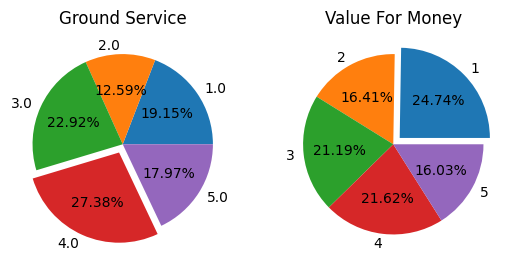

In [23]:
figure, axis = plt.subplots(1,2)
#Ground Service
stars = np.sort(df["Ground Service"].unique())
number = df["Ground Service"].value_counts()[stars]
axis[0].pie(number, labels=stars, autopct='%.2f%%', explode=[0 , 0, 0, 0.1, 0])
axis[0].set_title("Ground Service")


# Satisfaction (I consider Value For Money as Customer Satisfaction)
stars = np.sort(df["Value For Money"].unique())
number = df["Value For Money"].value_counts()[stars]
axis[1].pie(number, labels=stars, autopct='%.2f%%', explode=[0.1, 0, 0, 0, 0])
axis[1].set_title("Value For Money")

##### Comment
Base on the result of descrestive statistic above, some insights are gained:
1. The number of customers not recommended British Airway (BA) is higher than the number of customers that would recommend.

2. Most of BA customers are 'Couple leisure' traveller and the least are "Family Leisure".

3. Major of customers fly with "Economy" or "Business" ticket and least with "First Class" ticket. This can be easily explained by the price of the ticket with the fact that there are more people willing to pay for the cheaper tickets. However, although the price of "Premium Economy" ticket is lower than "Business", the number of customers of BA flight with "Premium Economy" still lower than that of "Business". This can be explained from the perspective that customers may not perceive a significant difference between the two ticket classes, "Economy" and "Premium Economy". BA may consider a strategy to enhance the service quality of this ticket class to attract customers.

4. For "Seat Comfort":
- Majority sastified: The highest percentage of respondents gave a rating of 4 points (25.01%) for seat comfort. This suggests that a significant portion of customers are generally satisfied with the comfort of the airline's seats.
- Room for Improvement: While the majority may be satisfied, there is still room for improvement as 1 in 5 respondents (20.93%) gave a rating of 1 point, indicating that some passengers find the seat comfort unsatisfactory.

5. For "Cabin Staff Service":
- High Rating: The majority of respondents gave a rating of 5 points (31.04%) for the cabin staff service. This indicates that a significant portion of customers had a positive experience with the airline's cabin crew.
- Mixed Responses: The distribution of ratings is spread across the spectrum, with no single rating point dominating the responses. This suggests that opinions about the cabin staff service vary among customers.
- Room for Improvement: While the majority gave positive ratings, there is still a substantial number of customers who were less satisfied, with 1 point (15.28%) and 2 points (13.93%) ratings. Addressing the concerns of these customers could help improve overall customer satisfaction.
- Consistency: The airline appears to have relatively consistent performance in terms of cabin staff service, with similar percentages of respondents giving ratings of 3, 4, and 5 points.

6. For "Food & Beverages":
- Low Rating: The majority of respondents gave a rating of 1 point (26.25%) for the food and beverages service. This indicates that a significant portion of customers were dissatisfied with the quality of food and drinks provided by the airline.
- Room for Improvement: The ratings show that there is room for improvement in the food and beverage service. With 1 in 4 customers giving a low rating, it is crucial for the airline to address the concerns and work on enhancing the dining experience.
- Neutral to Negative Responses: The combined percentage of 1 point and 2 points (26.25% + 16.25% = 42.50%) indicates that almost half of the respondents had a negative or neutral experience with the food and beverages service.

7. For "Inflight Entertainment":
- Neutral to Positive Responses: The majority of respondents gave a rating of 3 points (47.77%) for the inflight entertainment service. This indicates that a significant portion of customers had a neutral experience with the entertainment options provided by the airline.
- Room for Improvement: While the majority gave a neutral rating, there is still a notable number of customers who expressed dissatisfaction with the inflight entertainment. With 1 in 5 customers giving a rating of 1 point (17.64%), it is essential for the airline to address the concerns and enhance the entertainment offerings.

8. For "Ground Service":
- Moderate to Positive Responses: The majority of respondents gave a rating of 4 points (27.38%) for the ground service. This suggests that a significant portion of customers had a relatively positive experience with the airline's ground services.
- Room for Improvement: While the majority gave a positive rating, there is still a considerable percentage of customers who provided ratings of 1 point (19.15%) and 2 points (12.59%). Addressing the concerns raised by these customers could lead to an overall improvement in customer satisfaction.

10. Consider "Recommended" as the dependent variables and the remaining are independent variables, based on the correlation matrix:
- The correlation between "Type of traveller" and "Seat Type" are -0.22 and -0.008 respectively which are both negative and close to 0 indicates that these 2 factors have little impact on the decision to recommend BA to others.
- The correlation of "Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Inflight Entertainment", "Ground Service", "Value For Money" with "Recommended" range from 0.5 - 0.8 which is an ideal range. This means these factors have significant effect on customers when they consider to promote the airline or not.

